## Download surpsumu from IBES via WRDS
- Link for IBES at WRDS: https://wrds-www.wharton.upenn.edu/pages/get-data/ibes-thomson-reuters/

-------------------------

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wrds

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


In [4]:
ibes= conn.list_tables(library='ibes')
print(len(ibes))
ibes

194


['act_epsint',
 'act_epsus',
 'act_xepsint',
 'act_xepsus',
 'actg',
 'actgu',
 'actpsum_epsint',
 'actpsum_epsus',
 'actpsum_xepsint',
 'actpsum_xepsus',
 'actpsumu_epsint',
 'actpsumu_epsus',
 'actpsumu_xepsint',
 'actpsumu_xepsus',
 'actu_epsint',
 'actu_epsus',
 'actu_xepsint',
 'actu_xepsus',
 'adj',
 'adjsum',
 'cfnsum',
 'curr',
 'currnew',
 'det_epsint',
 'det_epsus',
 'det_guidance',
 'det_guidance_ext',
 'det_xepsint',
 'det_xepsus',
 'detsecd_sepint',
 'detsecd_xsepint',
 'detu_epsint',
 'detu_epsus',
 'detu_xepsint',
 'detu_xepsus',
 'detusecd_sepint',
 'detusecd_xsepint',
 'eurx',
 'exc_epsint',
 'exc_epsus',
 'exc_xepsint',
 'exc_xepsus',
 'excsecd_sepint',
 'excsecd_xsepint',
 'excu_epsint',
 'excu_epsus',
 'excu_xepsint',
 'excu_xepsus',
 'excusecd_sepint',
 'excusecd_xsepint',
 'glacct',
 'glaction',
 'glcode',
 'glcountry',
 'gldiff',
 'glperiod',
 'glrange',
 'glunit',
 'hdxrati',
 'hsxrat',
 'id',
 'id_guidance',
 'id_guidance_ext',
 'idsum',
 'igaact',
 'igachg',
 

In [5]:
sample= conn.get_table(library='ibes', table='surpsumu', obs=5)
sample.head(2)

,ticker,oftic,measure,fiscalp,pyear,pmon,usfirm,anndats,actual,surpmean,surpstdev,suescore
0,0000,TLMR,BPS,QTR,2014.0,3.0,1.0,2014-05-06,9.9700,9.8100,0.22906,0.69852
1,0000,TLMR,BPS,QTR,2014.0,6.0,1.0,2014-08-06,10.3068,10.1275,0.06238,2.87418


------------

### Download surpsumu (Surprise Summary) from IBES

In [6]:
df= conn.raw_sql(f"""select ticker, oftic, pyear, pmon, anndats
                    from ibes.surpsumu a                    
                    where a.measure = 'EPS' and 
                        a.usfirm = 1 and
                        a.fiscalp= 'QTR' and
                        a.anndats >= '2020-01-01' and
                        a.anndats <= '2021-12-31'
                    """)
df=df[(df.pyear>=2019) & (df.pyear<= 2021)]
df.head(2)

,ticker,oftic,pyear,pmon,anndats
0,000V,EIGR,2019.0,12.0,2020-03-13
1,000V,EIGR,2020.0,3.0,2020-05-07


In [7]:
# quarter
df.loc[(df.pmon<=3), 'pqtr']= 1
df.loc[(df.pmon>=4) & (df.pmon<=6), 'pqtr']= 2
df.loc[(df.pmon>=7) & (df.pmon<=9), 'pqtr']= 3
df.loc[(df.pmon>=10) & (df.pmon<=12), 'pqtr']= 4

# year, month, quarter to integers
df[['pyear', 'pmon', 'pqtr']]= df[['pyear', 'pmon', 'pqtr']].astype('int')

# year-quarter
df['pyq']= df['pyear'].astype('str') + "Q" +df['pqtr'].astype('str')

# year-month
df['pym']= df['pyear'].astype('str') + '_' + df['pmon'].astype('str').str.zfill(2)

df.head()

,ticker,oftic,pyear,pmon,anndats,pqtr,pyq,pym
0,000V,EIGR,2019,12,2020-03-13,4,2019Q4,2019_12
1,000V,EIGR,2020,3,2020-05-07,1,2020Q1,2020_03
2,000V,EIGR,2020,6,2020-08-06,2,2020Q2,2020_06
3,000V,EIGR,2020,9,2020-11-05,3,2020Q3,2020_09
4,000V,EIGR,2020,12,2021-03-09,4,2020Q4,2020_12


In [8]:
df.shape

(34484, 8)

In [9]:
df.pyear.value_counts().sort_index()

2019     3916
2020    16804
2021    13764
Name: pyear, dtype: int64

-----------

## Check data with visualization

In [12]:
df_yq= df.groupby('pyq').count()['ticker'].sort_index()
df_yq

pyq
2019Q1       1
2019Q2       2
2019Q3      17
2019Q4    3896
2020Q1    4111
2020Q2    4149
2020Q3    4214
2020Q4    4330
2021Q1    4356
2021Q2    4509
2021Q3    4645
2021Q4     254
Name: ticker, dtype: int64

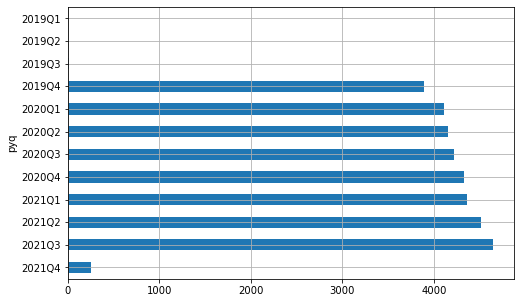

In [13]:
df_yq.sort_index(ascending=False).plot(kind='barh', figsize= (8,5), grid= True)
plt.show()

----------

### Save to .csv

In [16]:
df.to_csv("data/ibes_surpsumu.csv", index= None)

### Close connection

In [17]:
conn.close()

---------